In [22]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
import scienceplots
from prereqs.vectors import *
from sklearn.preprocessing import normalize

plt.style.use(['science', 'notebook', 'grid'])

In [23]:
_ = np.linspace(-10, 10, 20)

def create_rs(start, end, steps):
    z = y = x = start
    q = []
    
    while x <= end:
        while y <= end:
            while z <= end:
                q.append([x, y, z])
                z += steps

            z = 0
            y += steps
        y = 0
        x += steps
         
        
    return np.array(q)

r_ps = create_rs(0, 10, 2)
r_ps

array([[ 0,  0,  0],
       [ 0,  0,  2],
       [ 0,  0,  4],
       [ 0,  0,  6],
       [ 0,  0,  8],
       [ 0,  0, 10],
       [ 0,  2,  0],
       [ 0,  2,  2],
       [ 0,  2,  4],
       [ 0,  2,  6],
       [ 0,  2,  8],
       [ 0,  2, 10],
       [ 0,  4,  0],
       [ 0,  4,  2],
       [ 0,  4,  4],
       [ 0,  4,  6],
       [ 0,  4,  8],
       [ 0,  4, 10],
       [ 0,  6,  0],
       [ 0,  6,  2],
       [ 0,  6,  4],
       [ 0,  6,  6],
       [ 0,  6,  8],
       [ 0,  6, 10],
       [ 0,  8,  0],
       [ 0,  8,  2],
       [ 0,  8,  4],
       [ 0,  8,  6],
       [ 0,  8,  8],
       [ 0,  8, 10],
       [ 0, 10,  0],
       [ 0, 10,  2],
       [ 0, 10,  4],
       [ 0, 10,  6],
       [ 0, 10,  8],
       [ 0, 10, 10],
       [ 2,  0,  0],
       [ 2,  0,  2],
       [ 2,  0,  4],
       [ 2,  0,  6],
       [ 2,  0,  8],
       [ 2,  0, 10],
       [ 2,  2,  0],
       [ 2,  2,  2],
       [ 2,  2,  4],
       [ 2,  2,  6],
       [ 2,  2,  8],
       [ 2,  

In [24]:
s, ds = smp.symbols('s ds')
s

s

In [25]:

r_dl = Vector(smp.cos(s), smp.sin(s), s)
r_dl_prime = r_dl.differentiate()
r_dl_prime

Matrix([
[-sin(s)],
[ cos(s)],
[      1]])

In [26]:
r_p_index = 0
r_p = Vector(r_ps[r_p_index][0], r_ps[r_p_index][1], r_ps[r_p_index][2])
r_p_dl = r_p - r_dl
r_p_dl

Matrix([
[-cos(s)],
[-sin(s)],
[     -s]])

In [27]:

db = (r_dl_prime.cross(r_p_dl)/(r_p_dl.norm() ** 3))
db = Vector(db[0], db[1], db[2])
db.vector

Matrix([
[   (-s*cos(s) + sin(s))/(Abs(s)**2 + Abs(sin(s))**2 + Abs(cos(s))**2)**(3/2)],
[   (-s*sin(s) - cos(s))/(Abs(s)**2 + Abs(sin(s))**2 + Abs(cos(s))**2)**(3/2)],
[(sin(s)**2 + cos(s)**2)/(Abs(s)**2 + Abs(sin(s))**2 + Abs(cos(s))**2)**(3/2)]])

In [28]:
db_f = db.convert_to_function(s)   
b = integrate_function(db_f, [0, 2*np.pi])

b[2][0]

0.9875704921513918

/tmp/ipykernel_70113/2978564018.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


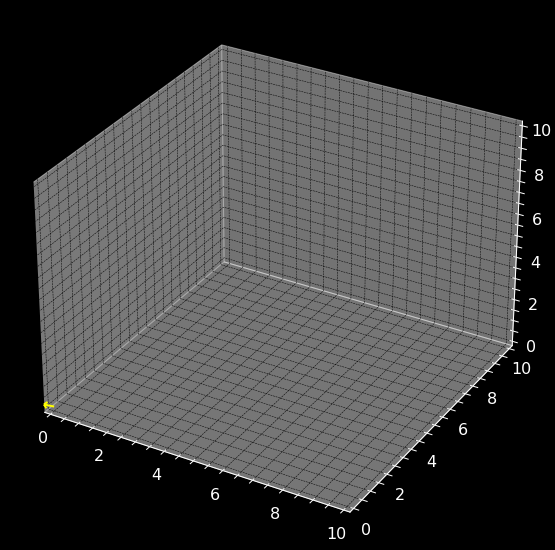

In [29]:
fig = plt.figure(figsize=(18,10))
ax = fig.gca(projection='3d')

r_p = np.array([0, 0, 0])

ax.quiver(r_p[0], r_p[1], r_p[2], b[0][0], b[1][0], b[2][0], color = 'yellow', length = 1)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)
plt.show()

In [30]:
# do the same process for all points ie r_p

r_p_index = 0
b = []
while r_p_index < len(r_ps):
    r_p = Vector(r_ps[r_p_index][0], r_ps[r_p_index][1], r_ps[r_p_index][2])
    r_p_dl = r_p - r_dl
    
    db = (r_dl_prime.cross(r_p_dl)/(r_p_dl.norm() ** 3))
    db = Vector(db[0], db[1], db[2])
    
    db_f = db.convert_to_function(s)   
    b.append(integrate_function(db_f, [0, 2*np.pi]))
    
    r_p_index += 1
    
b = np.array(b)
b[0]

array([[ 0.34451036],
       [-0.9997274 ],
       [ 0.98757049]])

In [31]:
r_p_index = 10
b[r_p_index]


array([[-0.12834967],
       [-0.04772409],
       [ 0.09739849]])

/tmp/ipykernel_70113/2855031119.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


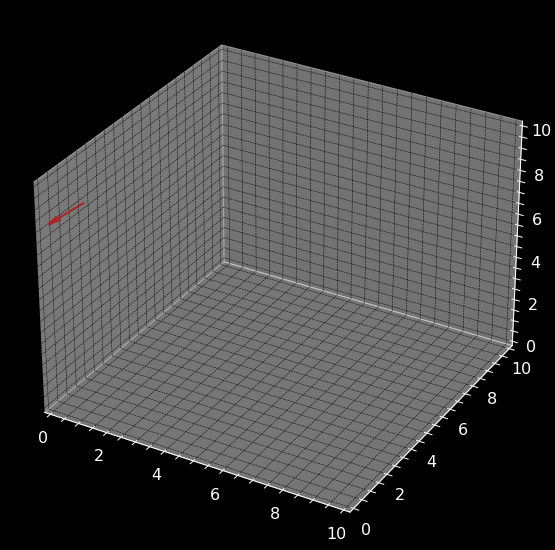

In [32]:
r_p_index = 10

fig = plt.figure(figsize=(18,10))
ax = fig.gca(projection='3d')

r_p = r_ps[r_p_index]

ax.quiver(r_p[0], r_p[1], r_p[2], b[r_p_index][0], b[r_p_index][0], b[r_p_index][0], color = '#ad2323', length = 6)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)
plt.show()

In [33]:
idx = 0
b_m = []

while idx < len(b):
    b_i = []

    for i in b[idx]:
        b_i.append(i[0])
        
    b_m.append(b_i)
    
    idx += 1



In [34]:
b_m = np.array(b_m)

for i in b_m:
    i /= np.linalg.norm(i)
    
b_m

array([[ 2.38107054e-01, -6.90957873e-01,  6.82555674e-01],
       [ 6.50419859e-01,  3.74552223e-01,  6.60806053e-01],
       [-5.34543703e-01,  5.30672432e-01,  6.57761203e-01],
       [-3.79863856e-01, -6.16885765e-01,  6.89315170e-01],
       [ 1.42490099e-01, -8.14383900e-01,  5.62561494e-01],
       [ 1.56604634e-01, -8.51247784e-01,  5.00851474e-01],
       [-7.78042273e-01, -6.01791569e-01, -1.80269601e-01],
       [-8.18945697e-01,  3.84916436e-01, -4.25637502e-01],
       [-8.47093318e-01,  4.55068609e-01,  2.74491296e-01],
       [-8.68990445e-01,  4.54667803e-03,  4.94807977e-01],
       [-7.63800870e-01, -2.84003103e-01,  5.79612344e-01],
       [-6.92616283e-01, -4.31545972e-01,  5.77971244e-01],
       [-9.40371302e-01, -1.55852155e-01, -3.02344041e-01],
       [-9.51957322e-01,  1.84639175e-01, -2.44306433e-01],
       [-9.52436736e-01,  2.99361635e-01,  5.69813577e-02],
       [-9.49510905e-01,  1.61419619e-01,  2.69021837e-01],
       [-9.31438808e-01,  4.90643386e-03

/tmp/ipykernel_70113/350804373.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


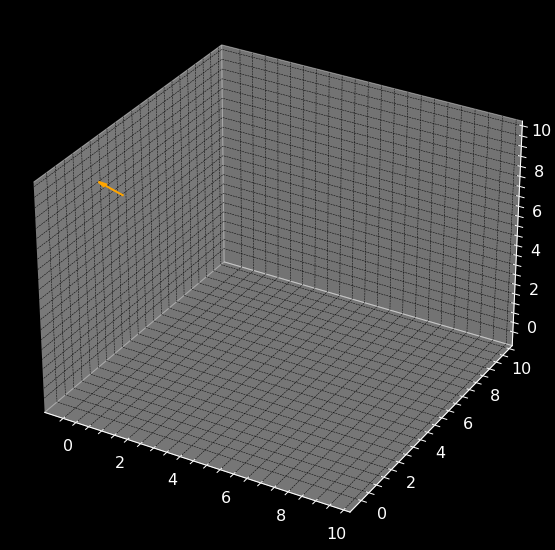

In [35]:
r_p_index = 10

fig = plt.figure(figsize=(18,10))
ax = fig.gca(projection='3d')

r_p = r_ps[r_p_index]
b_m_p = b_m[r_p_index]

ax.quiver(float(r_p[0]), r_p[1], r_p[2], b_m_p[0], b_m_p[1], b_m_p[2], color = 'orange', length = 1)
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 10)
ax.set_zlim(-1, 10)


plt.show()

In [36]:
x_ps = []
for i in r_ps:
    x_ps.append(i[0])
    
y_ps = []
for i in r_ps:
    y_ps.append(i[1])
    
z_ps = []
for i in r_ps:
    z_ps.append(i[2])

In [37]:
x_bm = []
for i in b_m:
    x_bm.append(i[0])
    
y_bm = []
for i in b_m:
    y_bm.append(i[1])
    
z_bm = []
for i in b_m:
    z_bm.append(i[2])

In [38]:
z_bm

[0.6825556743369765,
 0.6608060527373671,
 0.6577612029082123,
 0.6893151703625634,
 0.5625614939494763,
 0.5008514741740648,
 -0.18026960119724475,
 -0.42563750157423164,
 0.2744912964724822,
 0.4948079774148328,
 0.5796123435673783,
 0.5779712435842514,
 -0.30234404147815325,
 -0.2443064325748423,
 0.05698135771277222,
 0.2690218366065434,
 0.36386491236324936,
 0.39782590847518823,
 -0.2211952568633522,
 -0.1510392449890617,
 -0.0005860054041745231,
 0.13873684425012353,
 0.22564873151700005,
 0.2703069710671296,
 -0.15909205233118648,
 -0.10480248828827408,
 -0.01659587958691084,
 0.07334038285295791,
 0.14204833324011815,
 0.18616057266870248,
 -0.119225552866175,
 -0.0786558528316751,
 -0.021094402608423917,
 0.03972944924254775,
 0.09183018009412752,
 0.1304411721976377,
 -0.412598483231132,
 0.20705169040868873,
 0.25112171604210387,
 -0.34444801007796416,
 -0.05150808723838279,
 0.4949794733771288,
 -0.4431961472971088,
 -0.1310922647651705,
 0.22837871648184824,
 0.2819694604

/tmp/ipykernel_70113/73073844.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


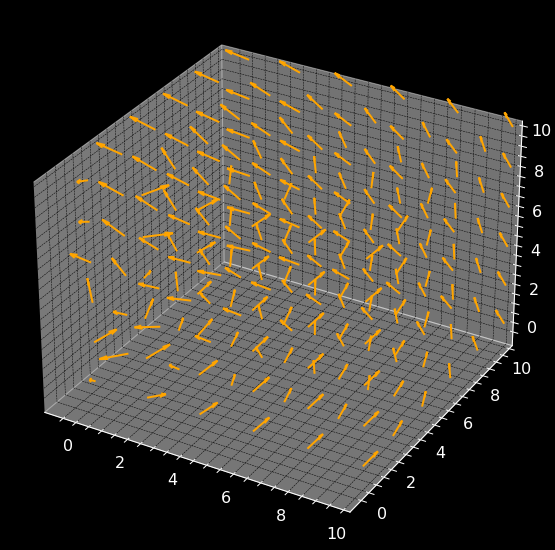

In [39]:
fig = plt.figure(figsize=(18,10))
ax = fig.gca(projection='3d')

ax.quiver(x_ps, y_ps, z_ps, x_bm, y_bm, z_bm, color = 'orange', length = 1.0)
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 10)
ax.set_zlim(-1, 10)


plt.show()